Análisis bajo riesgo
===

Notas de clase sobre ingeniería economica avanzada usando Python

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

**Software utilizado**
>Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org/) , en el cual se presenta un tutorial sobre finanzas corporativas usando Python. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.  

>Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

>Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en Try [Jupyter!](https://try.jupyter.org/)



#### Contenido

>

**Bibliografía**

> * [1] SAS/ETS 14.1 User's Guide, 2015.   
* [2] **hp** 12c platinum financial calculator. User's guide. 
* [3] HP Business Consultant II Owner's manual.
* [4] C.S. Park and G.P. Sharp-Bette. Advanced Engineering Economics. John Wiley & Sons, Inc., 1990.

In [1]:
import numpy.random as rdn
import cashflows as cf

In [12]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            costo,
            inversion):
    
    
    precio      = rdn.triangular(  8,  10,  12, 11).tolist()
    produccion  = rdn.triangular( 80, 100, 120, 11).tolist()
    
    
    ingre = cf.cashflow(const_value = 0, nper = 11, spec = [(t, precio[t] * produccion[t]) if t > 0 else (0,0) for t in range(11)])    
    opera = cf.cashflow(const_value = 0, nper = 11, spec = [(t, costo)                     if t > 0 else (0,0) for t in range(11)])
    inver = cf.cashflow(const_value = 0, nper = 11, spec = (0, inversion))
    
    asset = cf.cashflow(const_value=0, nper=11, spec=(0, inversion))
    life  = cf.cashflow(const_value=0, nper=11, spec=(0, 5))
    dep   = cf.depreciation_sl(costs = asset, life=life, noprint=True)
    
    antes = ingre - opera - inver - dep
    desp  = cf.after_tax_cashflow(antes, cf.nominal_rate([30] * 11))
    
    neto  = antes + dep
    
    npv   = cf.timevalue(cflo=neto, marr=marr)
    
    return npv

In [15]:
marr = cf.nominal_rate([10] * 11)
project(marr, 220, 2000)

2539.684056078263

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
result = []

for sim in range(1000):
    result.append(project(marr, 220, 2000))
result[1:10]

[2757.341543821538,
 2678.109448920463,
 2808.6178968520435,
 2581.0686672516185,
 2816.9834536658864,
 2587.947745823656,
 2602.3686346163554,
 3034.1005019383547,
 2722.463691840809]

(array([   8.,   59.,  140.,  215.,  272.,  195.,   73.,   28.,    7.,    3.]),
 array([ 2164.49619347,  2311.79194288,  2459.08769228,  2606.38344169,
         2753.67919109,  2900.9749405 ,  3048.2706899 ,  3195.5664393 ,
         3342.86218871,  3490.15793811,  3637.45368752]),
 <a list of 10 Patch objects>)

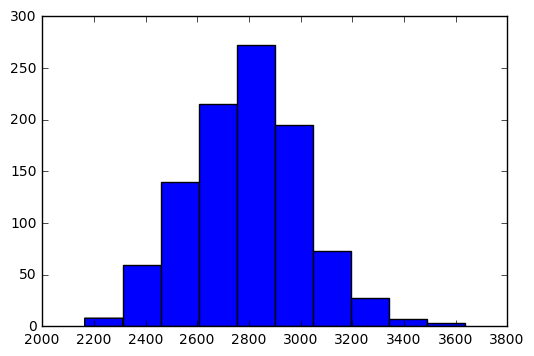

In [20]:
plt.hist(result)

---

**Ejercicio.--** Incluya en la simulación a las variables costo e inversión.

---

[Contenido](#Contenido)